In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tldextract
import numpy as np
import Levenshtein
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy

In [2]:
df = pd.read_csv("C:\\Users\\MCTI Student\\Downloads\\phishing-domains-ACTIVE.csv", header=None, names=["domain"])

In [3]:
df.head()

,domain
0,0000000000000000000000000.findyourjacket.com
1,00000000000000000000000056000005-102299.weebly...
2,00000000000000000000000.fielty.mx
3,00000000000000000update.emy.ba
4,0000000000c0.x9xcax2a.workers.dev


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196603 entries, 0 to 196602
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   domain  196603 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [5]:
df.describe()

,domain
count,196603
unique,196603
top,zt-za.fr
freq,1


In [6]:
top_10_domains = df['domain'].value_counts().head(10)

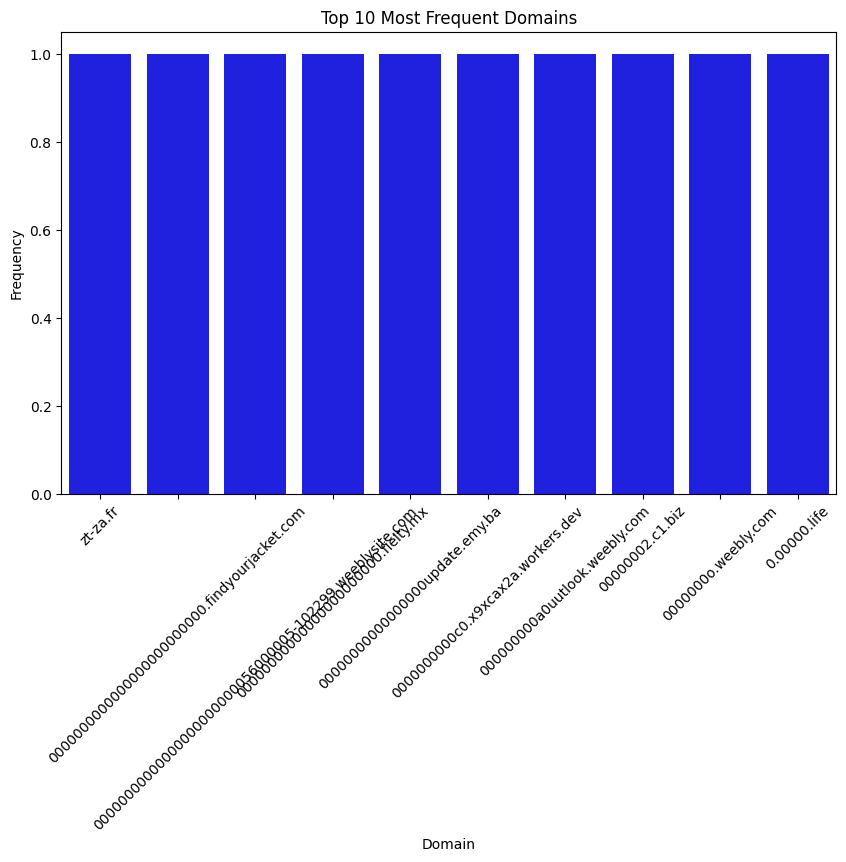

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_domains.index, y=top_10_domains.values, color='blue')  # Removed palette argument
plt.title('Top 10 Most Frequent Domains')
plt.xticks(rotation=45)
plt.xlabel('Domain')
plt.ylabel('Frequency')
plt.show()

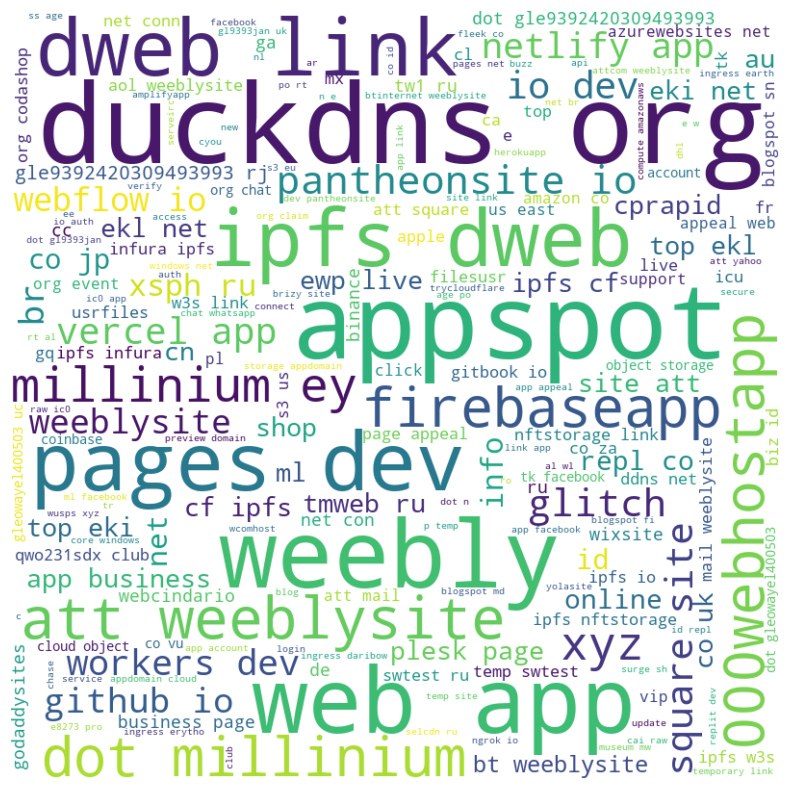

In [8]:
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df['domain']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

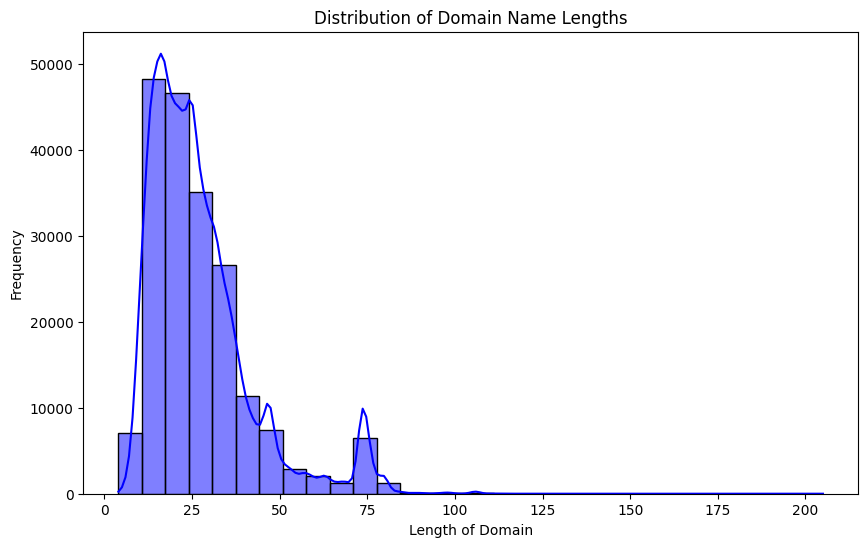

In [9]:
df['domain_length'] = df['domain'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['domain_length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Domain Name Lengths')
plt.xlabel('Length of Domain')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the number of missing values in each column
print(missing_values)

domain           0
domain_length    0
dtype: int64


In [11]:
df.head(50)

,domain,domain_length
0,0000000000000000000000000.findyourjacket.com,44
1,00000000000000000000000056000005-102299.weebly...,54
2,00000000000000000000000.fielty.mx,33
3,00000000000000000update.emy.ba,30
4,0000000000c0.x9xcax2a.workers.dev,33
5,000000000a0uutlook.weebly.com,29
6,00000002.c1.biz,15
7,0000000o.weebly.com,19
8,0.00000.life,12
9,000000login.weebly.com,22


In [12]:
def refined_clean_domain_v5(domain):
    # Remove any sequence of characters/numbers concatenated with hyphens before a dot (.)
    domain = re.sub(r'^[a-zA-Z0-9-]+(?=\.)', '', domain)
    # Remove any leading digits and hyphens (if any remain after the first step)
    domain = re.sub(r'^[\d-]+', '', domain)
    # Remove any leading dot that might appear after cleaning
    domain = re.sub(r'^\.', '', domain)
    return domain

In [13]:
df['cleaned_domain'] = df['domain'].apply(refined_clean_domain_v5)

In [14]:
df[['cleaned_domain']].head(50)

,cleaned_domain
0,findyourjacket.com
1,weeblysite.com
2,fielty.mx
3,emy.ba
4,x9xcax2a.workers.dev
5,weebly.com
6,c1.biz
7,weebly.com
8,00000.life
9,weebly.com


In [15]:
def extract_features(df):
    # Extract length of the domain
    df['length'] = df['cleaned_domain'].apply(lambda x: len(x))

    # Count number of subdomains
    df['subdomain_count'] = df['cleaned_domain'].apply(lambda x: x.count('.') - 1)

    # Check if domain contains digits
    df['has_digits'] = df['cleaned_domain'].apply(lambda x: any(char.isdigit() for char in x))

    # Check if domain contains special characters
    df['has_special_chars'] = df['cleaned_domain'].apply(lambda x: any(char in '!@#$%^&*()_+-=~`' for char in x))

    return df

# Apply feature extraction to the dataframe
df = extract_features(df)
print(df)

                                                   domain  domain_length  \
0            0000000000000000000000000.findyourjacket.com             44   
1       00000000000000000000000056000005-102299.weebly...             54   
2                       00000000000000000000000.fielty.mx             33   
3                          00000000000000000update.emy.ba             30   
4                       0000000000c0.x9xcax2a.workers.dev             33   
...                                                   ...            ...   
196598                                    yuppiiechef.com             15   
196599                                      zc11m.csb.app             13   
196600                         zk-manta-airdrop.pages.dev             26   
196601                               zttmct-tlemp.web.app             20   
196602                                           zt-za.fr              8   

              cleaned_domain  length  subdomain_count  has_digits  \
0         findyour

In [16]:
vectorizer1 = CountVectorizer(analyzer='char_wb', ngram_range=(2, 4))  # Character-level analysis
vectorizer2 = TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 4))

X_count = vectorizer1.fit_transform(df['cleaned_domain'])
X_tfidf = vectorizer2.fit_transform(df['cleaned_domain'])

# Combine both features
import scipy.sparse
X_combined = scipy.sparse.hstack((X_count, X_tfidf))

In [17]:
num_clusters = 3  # Adjust based on dataset size
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_combined)

df['cluster'] = labels
print(df[['cleaned_domain', 'cluster']])

              cleaned_domain  cluster
0         findyourjacket.com        0
1             weeblysite.com        0
2                  fielty.mx        2
3                     emy.ba        2
4       x9xcax2a.workers.dev        2
...                      ...      ...
196598                   com        0
196599               csb.app        2
196600             pages.dev        2
196601               web.app        2
196602                    fr        2

[196603 rows x 2 columns]


In [18]:
print(df['cluster'].value_counts())

cluster
2    102591
0     87069
1      6943
Name: count, dtype: int64


In [19]:
for cluster_num in df['cluster'].unique():
    print(f"Cluster {cluster_num}:")
    print(df[df['cluster'] == cluster_num]['cleaned_domain'].head(10))  # Change `head(10)` to more if needed
    print("\n")

Cluster 0:
0     findyourjacket.com
1         weeblysite.com
5             weebly.com
7             weebly.com
9             weebly.com
10            weebly.com
11            weebly.com
14         byethost7.com
19            weebly.com
21            weebly.com
Name: cleaned_domain, dtype: object


Cluster 2:
2                         fielty.mx
3                            emy.ba
4              x9xcax2a.workers.dev
6                            c1.biz
8                        00000.life
12                        pages.dev
13       0.0.0forum.cryptonight.net
15                        hopto.org
16    0.0.0mailgate.cryptonight.net
17        0.0.0ns10.cryptonight.net
Name: cleaned_domain, dtype: object


Cluster 1:
23                   duckdns.org
39                   duckdns.org
83                   duckdns.org
89     freefire-work.duckdns.org
145                  duckdns.org
160                  duckdns.org
172                  duckdns.org
179                  duckdns.org
184              

In [20]:
df['domain_length'] = df['cleaned_domain'].apply(lambda x: len(x))
print(df)

                                                   domain  domain_length  \
0            0000000000000000000000000.findyourjacket.com             18   
1       00000000000000000000000056000005-102299.weebly...             14   
2                       00000000000000000000000.fielty.mx              9   
3                          00000000000000000update.emy.ba              6   
4                       0000000000c0.x9xcax2a.workers.dev             20   
...                                                   ...            ...   
196598                                    yuppiiechef.com              3   
196599                                      zc11m.csb.app              7   
196600                         zk-manta-airdrop.pages.dev              9   
196601                               zttmct-tlemp.web.app              7   
196602                                           zt-za.fr              2   

              cleaned_domain  length  subdomain_count  has_digits  \
0         findyour

In [21]:
df['tld'] = df['cleaned_domain'].apply(lambda x: x.split('.')[-1])
print(df)

                                                   domain  domain_length  \
0            0000000000000000000000000.findyourjacket.com             18   
1       00000000000000000000000056000005-102299.weebly...             14   
2                       00000000000000000000000.fielty.mx              9   
3                          00000000000000000update.emy.ba              6   
4                       0000000000c0.x9xcax2a.workers.dev             20   
...                                                   ...            ...   
196598                                    yuppiiechef.com              3   
196599                                      zc11m.csb.app              7   
196600                         zk-manta-airdrop.pages.dev              9   
196601                               zttmct-tlemp.web.app              7   
196602                                           zt-za.fr              2   

              cleaned_domain  length  subdomain_count  has_digits  \
0         findyour

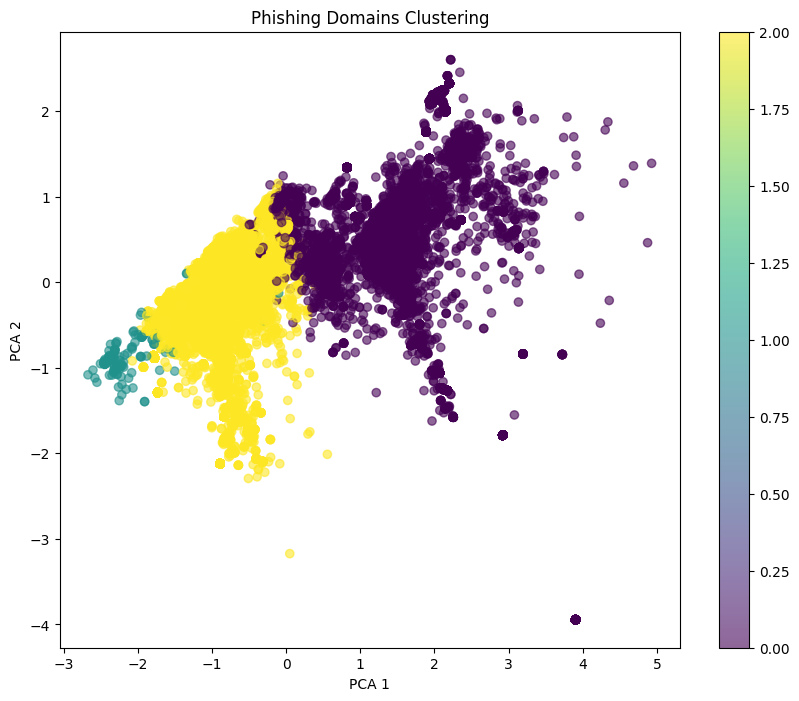

In [23]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_combined)  # You need to have the X_combined features

# Add PCA results to dataframe for plotting
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(df['pca1'], df['pca2'], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.title('Phishing Domains Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()

In [24]:
df['extracted'] = df['cleaned_domain'].apply(tldextract.extract)
df['domain'] = df['extracted'].apply(lambda x: x.domain)  # Extract the domain name
df['tld'] = df['extracted'].apply(lambda x: x.suffix)     # Extract the TLD

In [25]:
tld_counts = df['tld'].value_counts()
domain_counts = df['domain'].value_counts()

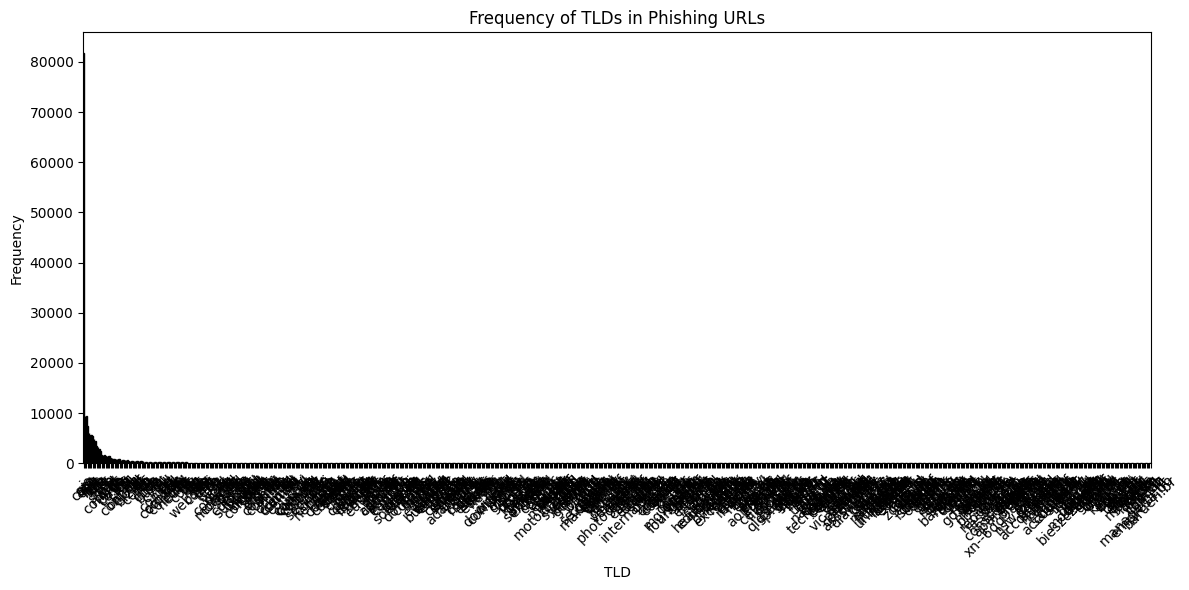

In [26]:
plt.figure(figsize=(12, 6))
tld_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of TLDs in Phishing URLs')
plt.xlabel('TLD')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

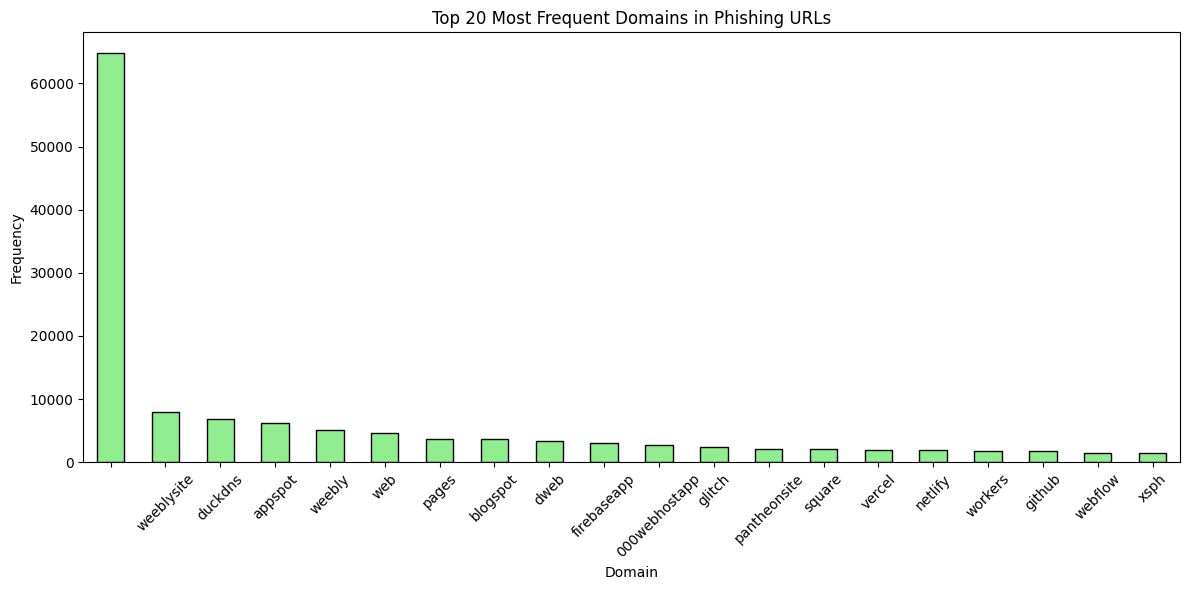

In [27]:
plt.figure(figsize=(12, 6))
domain_counts.head(20).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 20 Most Frequent Domains in Phishing URLs')
plt.xlabel('Domain')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
print("Top TLDs:\n", tld_counts.head(10))
print("\nTop Domains:\n", domain_counts.head(10))

Top TLDs:
 tld
com     81808
org      9450
app      9315
io       7382
dev      5930
         5699
net      5616
link     5507
ru       4911
top      4420
Name: count, dtype: int64

Top Domains:
 domain
               64855
weeblysite      7880
duckdns         6914
appspot         6174
weebly          5045
web             4646
pages           3747
blogspot        3708
dweb            3316
firebaseapp     3113
Name: count, dtype: int64


In [29]:
df['subdomain'] = df['extracted'].apply(lambda x: x.subdomain)

In [30]:
subdomain_counts = df['subdomain'].value_counts()

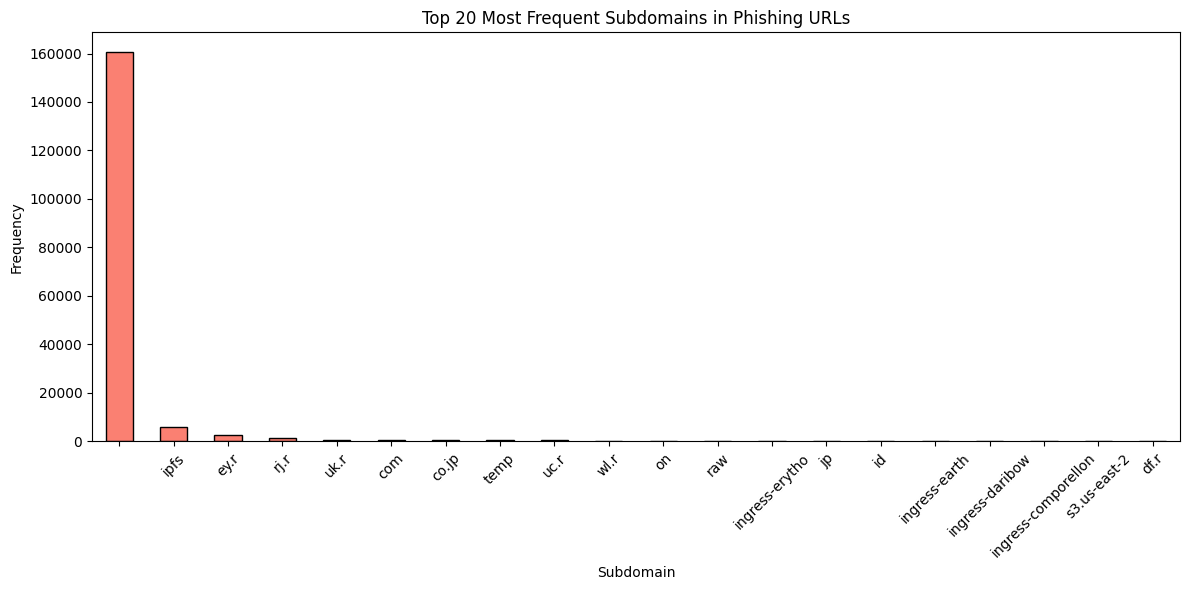

In [31]:
plt.figure(figsize=(12, 6))
subdomain_counts.head(20).plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 20 Most Frequent Subdomains in Phishing URLs')
plt.xlabel('Subdomain')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
suspicious_subdomains = df[df['cluster'] == 2]  # Cluster 2 might represent phishing URLs in your case
subdomain_counts_suspicious = suspicious_subdomains['subdomain'].value_counts()

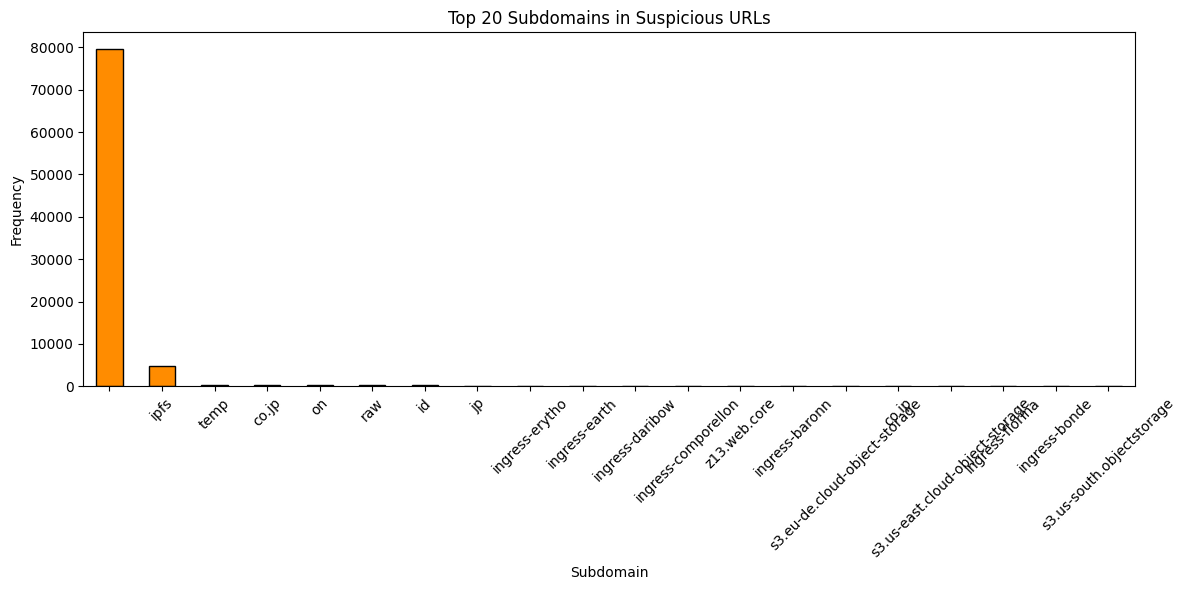

In [33]:
plt.figure(figsize=(12, 6))
subdomain_counts_suspicious.head(20).plot(kind='bar', color='darkorange', edgecolor='black')
plt.title('Top 20 Subdomains in Suspicious URLs')
plt.xlabel('Subdomain')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
print("Top Subdomains:\n", subdomain_counts.head(10))
print("\nTop Suspicious Subdomains:\n", subdomain_counts_suspicious.head(10))

Top Subdomains:
 subdomain
         160702
ipfs       5920
ey.r       2747
rj.r       1248
uk.r        621
com         500
co.jp       486
temp        408
uc.r        381
wl.r        335
Name: count, dtype: int64

Top Suspicious Subdomains:
 subdomain
                  79591
ipfs               4886
temp                408
co.jp               393
on                  225
raw                 221
id                  180
jp                  171
ingress-erytho      152
ingress-earth       146
Name: count, dtype: int64


In [35]:
df['url_length'] = df['cleaned_domain'].apply(len)

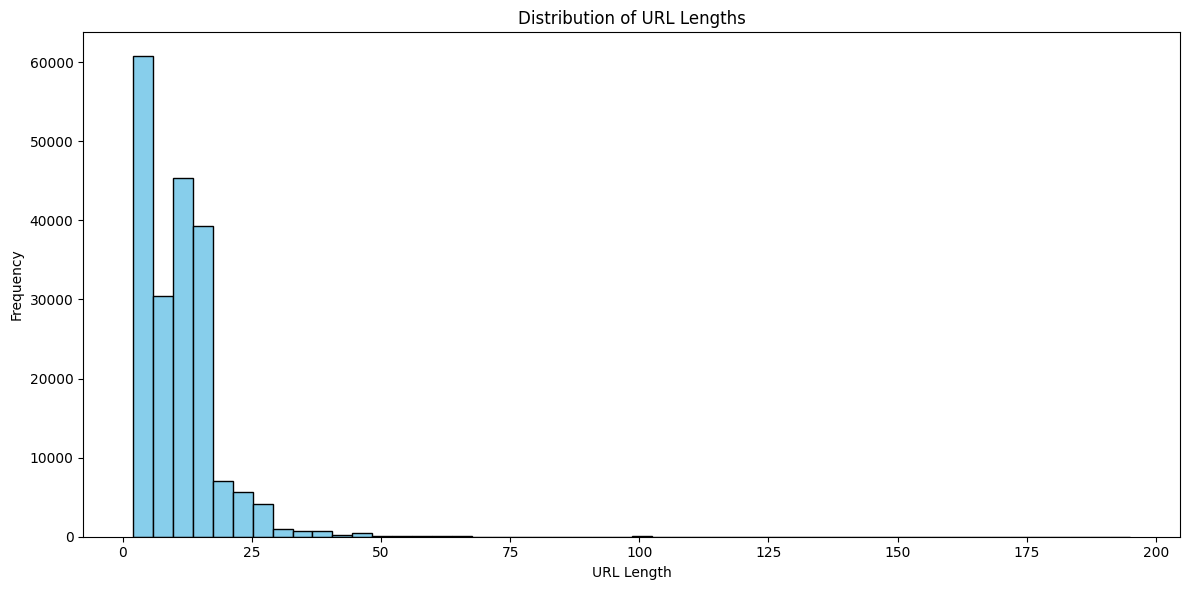

In [36]:
plt.figure(figsize=(12, 6))
df['url_length'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of URL Lengths')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [37]:
threshold_length = 100
long_urls = df[df['url_length'] > threshold_length]

# Show a sample of URLs with long lengths
print("Sample of Long URLs (Length > 100):")
print(long_urls[['cleaned_domain', 'url_length']].head())

Sample of Long URLs (Length > 100):
                                          cleaned_domain  url_length
808    71993e6f8e87e5d4c6b1219e0503a95b17c21f.08e8e5a...         117
4597   71993e6f8e87e5d4c6b1219e0503a95b17c21f.175ea78...         119
8584   8.ds1oipz.wisconsinmetalfab.8.wisconsinmetalfa...         111
16625  5a0b89620e2511892267cb9412aee3e2aec04e.629ef87...         118
18817  71993e6f8e87e5d4c6b1219e0503a95b17c21f.7d749aa...         116


In [38]:
# Step 4: Detect URLs with random characters using regex patterns
# A simple pattern to detect random alphanumeric strings (you can adjust it based on your data)
random_char_pattern = r'[a-zA-Z0-9]{8,}'  # This matches 8 or more alphanumeric characters

In [40]:
df['has_random_characters'] = df['cleaned_domain'].apply(lambda x: bool(re.search(random_char_pattern, x)))

In [41]:
random_urls = df[df['has_random_characters'] == True]

In [42]:
# Sample of suspicious URLs with random characters
print("Sample of URLs with Random Characters:")
print(random_urls[['cleaned_domain', 'has_random_characters']].head())

Sample of URLs with Random Characters:
                cleaned_domain  has_random_characters
0           findyourjacket.com                   True
1               weeblysite.com                   True
4         x9xcax2a.workers.dev                   True
13  0.0.0forum.cryptonight.net                   True
14               byethost7.com                   True


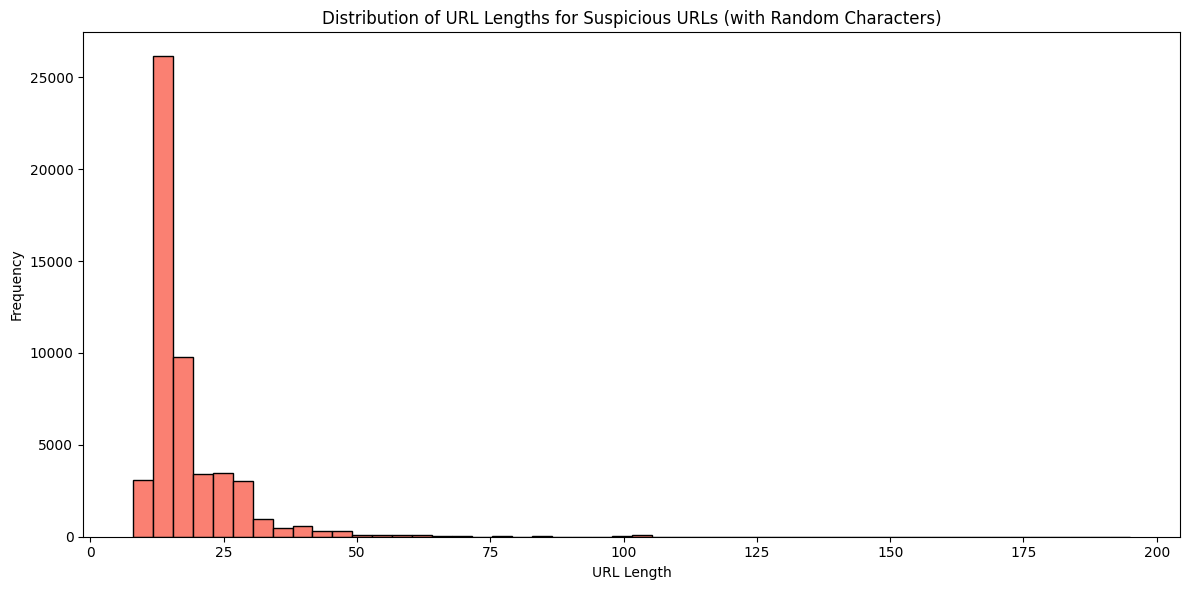

In [43]:
# Step 6: Visualize the URL lengths of suspicious URLs
plt.figure(figsize=(12, 6))
random_urls['url_length'].plot(kind='hist', bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of URL Lengths for Suspicious URLs (with Random Characters)')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [44]:
# Step 1: Investigate the distribution of URLs across clusters
cluster_counts = df['cluster'].value_counts()
print("Cluster Distribution:")
print(cluster_counts)

Cluster Distribution:
cluster
2    102591
0     87069
1      6943
Name: count, dtype: int64


In [45]:
# Step 2: Analyze URL length by cluster
df['url_length'] = df['cleaned_domain'].apply(len)

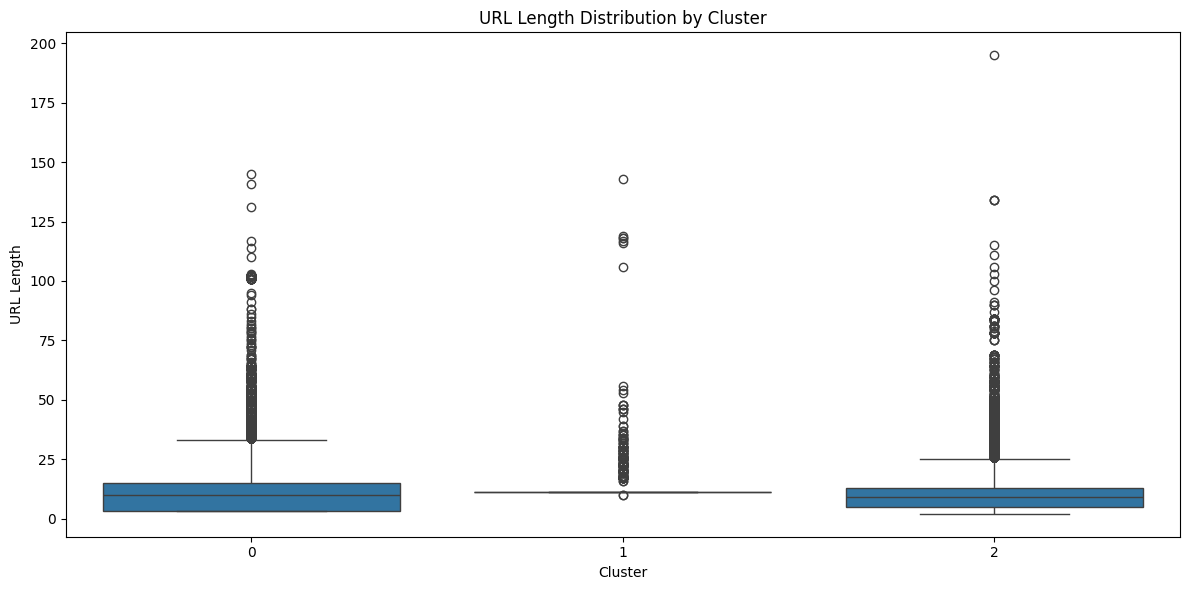

In [46]:
# Visualizing URL length distribution for each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='url_length', data=df)
plt.title('URL Length Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('URL Length')
plt.tight_layout()
plt.show()

In [47]:
df['tld'] = df['cleaned_domain'].apply(lambda x: x.split('.')[-1])

# Visualize TLD distribution by cluster
tld_cluster_counts = df.groupby(['cluster', 'tld']).size().unstack().fillna(0)

C:\Users\MCTI Student\AppData\Local\Temp\ipykernel_11404\1756725643.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


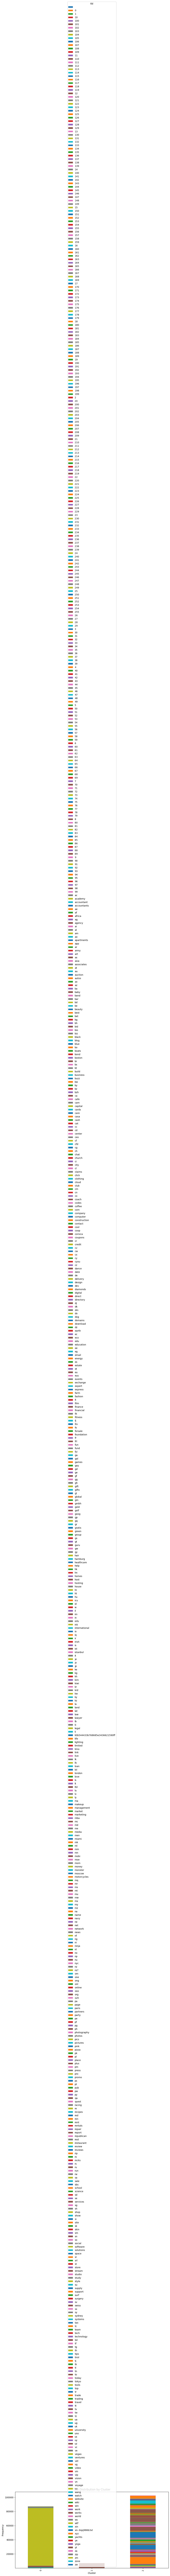

In [48]:
# Plot TLD distribution for each cluster
tld_cluster_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('TLD Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [49]:
top_domains_by_cluster = df.groupby('cluster')['cleaned_domain'].value_counts().unstack().fillna(0)

In [50]:
print("Top Domains by Cluster:")
print(top_domains_by_cluster)

Top Domains by Cluster:
cleaned_domain  0-gh.se.ke  0.0.0forum.cryptonight.net  \
cluster                                                  
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      1.0                         1.0   

cleaned_domain  0.0.0mailgate.cryptonight.net  0.0.0ns10.cryptonight.net  \
cluster                                                                    
0                                         0.0                        0.0   
1                                         0.0                        0.0   
2                                         1.0                        1.0   

cleaned_domain  0.0.0ssl.cryptonight.net  0.0assets.cryptonight.net  \
cluster                                                               
0                                    0.0                        0.0   
1                                    0.0                        0.0   
2                   

In [51]:
long_urls_in_clusters = df[df['url_length'] > 100].groupby('cluster').size()

In [52]:
print("Clusters with Long URLs (length > 100):")
print(long_urls_in_clusters)

Clusters with Long URLs (length > 100):
cluster
0    126
1      7
2      8
dtype: int64


In [56]:
def calculate_entropy(url):
    prob_dist = np.array([url.count(char) for char in set(url)]) / len(url)
    return entropy(prob_dist, base=2)

df['entropy'] = df['cleaned_domain'].apply(calculate_entropy)

In [59]:
# List of known legitimate domains (expand as needed)
safe_domains = ["paypal.com", "microsoft.com", "google.com", "apple.com", "amazon.com"]

def min_levenshtein_distance(url):
    return min([Levenshtein.distance(url, safe) for safe in safe_domains])

df['levenshtein_score'] = df['cleaned_domain'].apply(min_levenshtein_distance)

In [61]:
df["tld"] = df["cleaned_domain"].apply(lambda x: tldextract.extract(x).suffix)

In [62]:
# Count occurrences of each TLD
tld_counts = df["tld"].value_counts().to_dict()

# Map the frequency back to the dataframe
df["tld_freq"] = df["tld"].map(tld_counts)

In [63]:
# Normalize features to range [0,1]
scaler = MinMaxScaler()

df['norm_url_length'] = scaler.fit_transform(df[['url_length']])
df['norm_entropy'] = scaler.fit_transform(df[['entropy']])
df['norm_levenshtein'] = scaler.fit_transform(df[['levenshtein_score']])
df['norm_tld_freq'] = scaler.fit_transform(df[['tld_freq']])  # TLD frequency

# Define feature weights (adjustable based on importance)
weights = {
    'norm_url_length': 0.2,  # Long URLs → more phishing likelihood
    'norm_entropy': 0.3,      # High entropy → more randomness (suspect)
    'norm_levenshtein': 0.3,  # Similarity to brand names → phishing risk
    'norm_tld_freq': 0.2,     # Suspicious TLDs → more phishing likelihood
}

In [64]:
df['phishing_risk_score'] = (
    df['norm_url_length'] * weights['norm_url_length'] +
    df['norm_entropy'] * weights['norm_entropy'] +
    df['norm_levenshtein'] * weights['norm_levenshtein'] +
    df['norm_tld_freq'] * weights['norm_tld_freq']
)

In [65]:
def categorize_risk(score):
    if score >= 0.7:
        return "High Risk 🚨"
    elif score >= 0.4:
        return "Medium Risk ⚠️"
    else:
        return "Low Risk ✅"

df['risk_category'] = df['phishing_risk_score'].apply(categorize_risk)

In [66]:
print(df[['cleaned_domain', 'phishing_risk_score', 'risk_category']].sort_values(by='phishing_risk_score', ascending=False).head(20))

                                           cleaned_domain  \
80344   co.account.update.ds454f4ds2f124.dsfw5asd2das1...   
26586   google.com.serviceloginservicemailpassivetruer...   
115769  n.z7mard.yhfnxn4yif.yyg.44f4bm8jj.tjgs.a7fwx4s...   
140443  com-6159368de39251d7a-login.id-107sbtd9cbhsbtd...   
140390  com-6159368de39251d7a-login.id-107sbtd9cbhsbtd...   
140403  com-6159368de39251d7a-login.id-107sbtd9cbhsbtd...   
140387  com-6159368de39251d7a-login.id-107sbtd9cbhsbtd...   
140418  com-6159368de39251d7a-login.id-107sbtd9cbhsbtd...   
140384  com-6159368de39251d7a-login.id-107sbtd9cbhsbtd...   
140458  com-6159368de39251d7a-login.id-107sbtd9cbhsbtd...   
140378  com-6159368de39251d7a-login.id-107sbtd9cbhsbtd...   
140379  com-6159368de39251d7a-login.id-107sbtd9cbhsbtd...   
140490  com-6159368de39251d7a-login.id-107sbtd9cbhsbtd...   
140472  com-6159368de39251d7a-login.id-107sbtd9cbhsbtd...   
140476  com-6159368de39251d7a-login.id-107sbtd9cbhsbtd...   
140414  com-6159368de392